<a href="https://colab.research.google.com/github/jithendra1798/ML-CS-GY-6923-B/blob/main/01_ML-cs-gy-6923-B-lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Ames Housing dataset which is a commonly used machine learning data set for illustrating basic concepts.  

## Acknowledgement

This lab is imported from prof. Christopher Musco's 2024 iteration of CS-GY 6923. Thanks Chris!

## Loading the data

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file linked above.

In [ ]:
import pandas as pd
import numpy as np
# TODO:  Complete the code
df = pd.read_csv('https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv')

Display the first six rows of the data frame

In [ ]:
# TODO
df.head(6)

,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9
5,9978,1998,324.0,926.0,926,678,1604,2,1,3,7,1,2.0,470.0,195.5


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [ ]:
# TODO
N = df.shape[0]
no_of_features = df.shape[1]

print(f'num samples = {N}, num attributes = {no_of_features}')

num samples = 2930, num attributes = 15


The dataset contains some NaN value. Before proceeding, drop all rows from the dataframe with NaN values. There should only be a few.

In [ ]:
# TODO
df = df.dropna()
df.shape

(2928, 15)

In [ ]:
df.isna().sum()

,0
Lot Area,0
Year Built,0
Bsmt Unf SF,0
Total Bsmt SF,0
1st Flr SF,0
2nd Flr SF,0
Gr Liv Area,0
Full Bath,0
Half Bath,0
Bedroom AbvGr,0


Create a response vector `y` with the values in the column `SalePrice`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [ ]:
label = 'SalePrice'
features = df.columns.tolist()
features.remove(label)
print(len(features))

14


In [ ]:
# TODO
y = df[label]
y.shape

(2928,)

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $120k. Print and label your results.

In [ ]:
# TODO
print('Mean house price:', round(y.mean(), 2))
print('Fraction of houses with price > $120K:', round((y>120).sum()/y.shape[0], 2))

Mean house price: 180.84
Fraction of houses with price > $120K: 0.82


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `TotRms AbvGrd` column, which represents the total number of non-basement rooms in the home.

In [ ]:
# TODO
features = ['TotRms AbvGrd']
X = df[features]
X.shape

(2928, 1)

Create a scatter plot of the price vs. the `TotRms AbvGrd` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

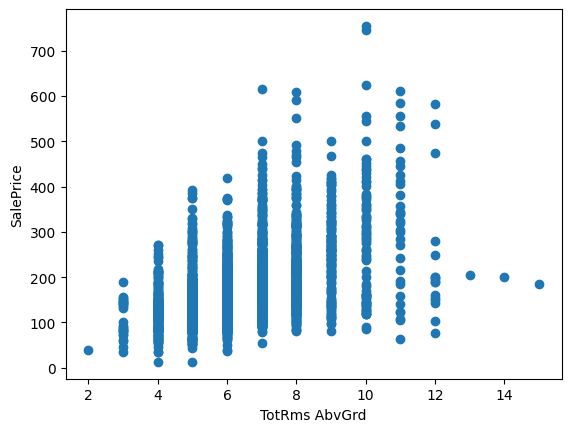

In [ ]:
# TODO
plt.scatter(X, y)
plt.xlabel(features[0])
plt.ylabel(label)
plt.show()

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [ ]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    # TODO complete the following code
    x = np.asarray(x)
    y = np.asarray(y)

    xm = np.mean(x)
    ym = np.mean(y)

    syx = np.mean((y-ym)*(x-xm))
    sxx = np.mean((x-xm)**2)
    syy = np.mean((y-ym)**2)
    beta1 = syx/sxx
    beta0 = ym - beta1*xm

    yhat=beta0+beta1*x
    loss = np.sum((y-yhat)**2)
    return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [ ]:
# TODO
x = np.asarray(X[features])[:,0]
beta0, beta1, loss = fit_linear(x,y)

print(f'Loss = {loss : .2f}')
print(f'beta0 = {beta0 : .2f}')
print(f'beta1 = {beta1 : .2f}')


Loss =  14101634.93
beta0 =  18.78
beta1 =  25.15


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

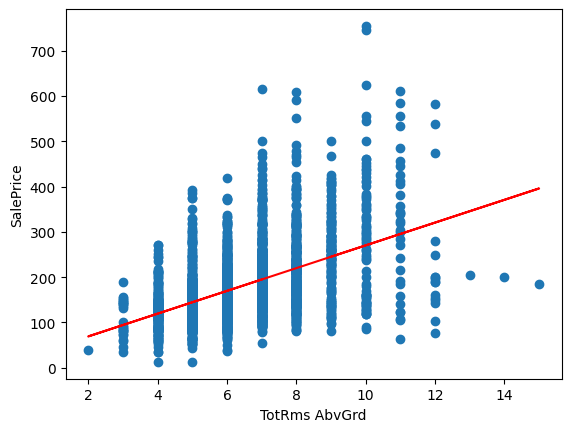

In [ ]:
# TODO
yp = beta0 + x * beta1
plt.plot(X, yp, color="red", label="Fitted line")
plt.scatter(X, y)
plt.xlabel(features[0])
plt.ylabel(label)
plt.show()

# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    Lot Area           XXXXX
    Overall Qual       XXXXX
    Overall Cond       XXXXX
    ...         ...

You will need to write a loop to perform this task.

What variable does the best job predicting house price?

In [ ]:
# TODO

features = []
losses = []
for col in df.columns:
    if col!=label:
        x = np.asarray(df[[col]])[:,0]
        beta0, beta1, loss = fit_linear(x,y)

        # print(f'Loss = {loss : .2f}')
        # print(f'beta0 = {beta0 : .2f}')
        # print(f'beta1 = {beta1 : .2f}')

        features.append(col)
        losses.append(f'{loss: .2f}')
loss_df = pd.DataFrame({
    'feature': features,
    'loss': losses
})
loss_df

,feature,loss
0,Lot Area,17355552.13
1,Year Built,12857597.52
2,Bsmt Unf SF,18057043.35
3,Total Bsmt SF,11213377.81
4,1st Flr SF,11463538.46
5,2nd Flr SF,17325635.37
6,Gr Liv Area,9349292.71
7,Full Bath,13120702.49
8,Half Bath,17166315.15
9,Bedroom AbvGr,18296281.04


**TODO:** Describe in words the meaning of the most predictive variable for housing price.

Gr Liv Area - This predictive variable will do the best job in predicting the housing price

The housing price can best be determined by Above grade (ground) living area square feet

# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,.1)` and $\beta_1$ is in `np.arange(-1,1,.005)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [ ]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # min_loss = ...

    return beta0, beta1, min_loss

Compare the output of `fit_approx` and `fit_linear` with `y` being `SalePrice` and `x` being the `Gr Liv Area` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [ ]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    """

    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # min_loss = ...

    return beta0, beta1, min_loss

In [ ]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.
    """
    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # min_loss = ...

    return beta0, beta1, min_loss

**TODO:** Use your algorithm to obtain 3 different linear fits for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so you might need to adjust your approximate fit functions accordingly.

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.